## The Sparks Foundation Task 2
### Submitted By Shubham Hingu

#### Importing all the required Libraries of python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Importing the Data set from the given url using pandas library

In [2]:
data= pd.read_csv('iris.csv')
print('Data Imported')

Data Imported


### Setting the Id column as index to access rows to avoid confusion in actual indexes and Id column

In [3]:
data.set_index('Id',inplace=True)

#### Viewing the first 5 rows of the data set

In [4]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


#### Checking the count of the different species in the dataset

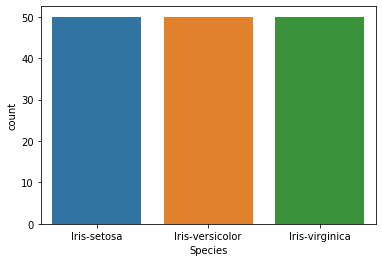

In [5]:
sns.countplot('Species',data=data)

#### From the above plot it is inferred that there are 50 species each of Iris-setosa,Iris-versicolor and Iris-Virginica

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 12.0+ KB


In [7]:
sns.set_style('dark')

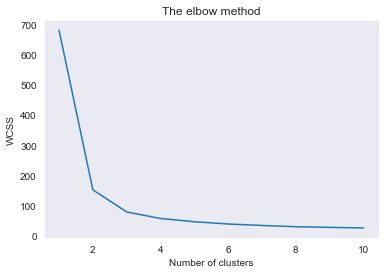

In [8]:
x = data.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wc = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wc.append(kmeans.inertia_)
plt.plot(range(1, 11), wc)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

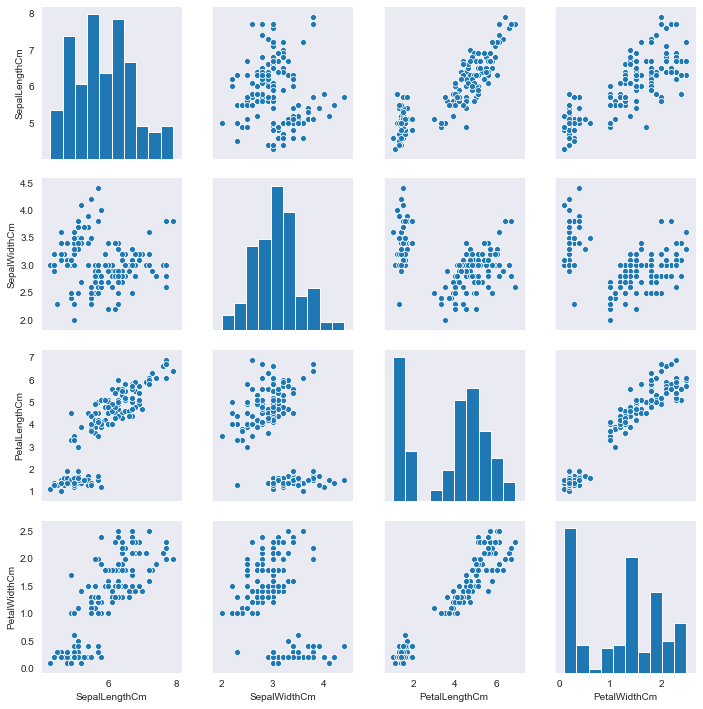

In [9]:
sns.pairplot(data=data)

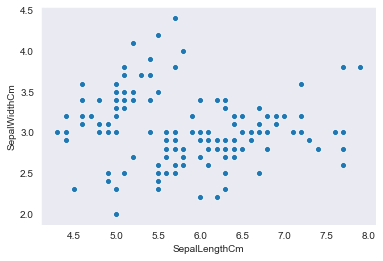

In [10]:
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=data)

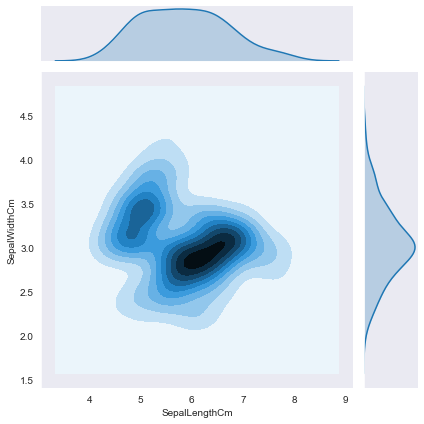

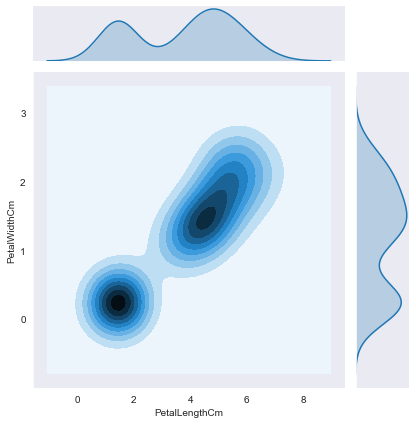

In [11]:
sns.jointplot(x='SepalLengthCm',y='SepalWidthCm',data=data,kind='kde')
sns.jointplot(x='PetalLengthCm',y='PetalWidthCm',data=data,kind='kde')

In [12]:
x=data.iloc[:, [0, 1, 2, 3]].values
y=data['Species']

#### Since from the above countplot we know that there are 3 types of species in our data set so we will consider the number of clusters as 3

#### importing the k-means algorithm from sklearn library

In [13]:
from sklearn.cluster import KMeans

In [14]:
kmeans=KMeans(n_clusters=3)

In [15]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [17]:
y_kmeans = kmeans.fit_predict(x)

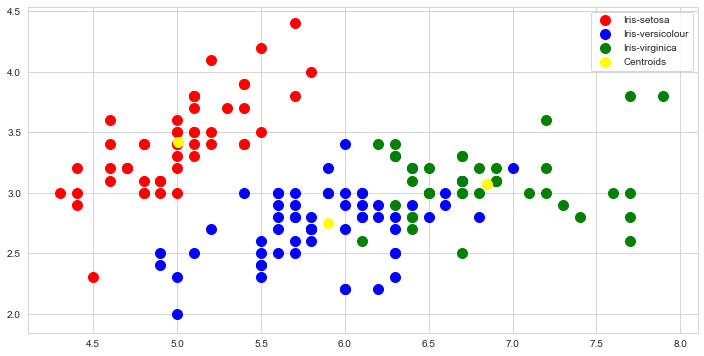

In [18]:
# Visualising the clusters - On the first two columns
sns.set_style('whitegrid')
plt.subplots(figsize=(12,6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()